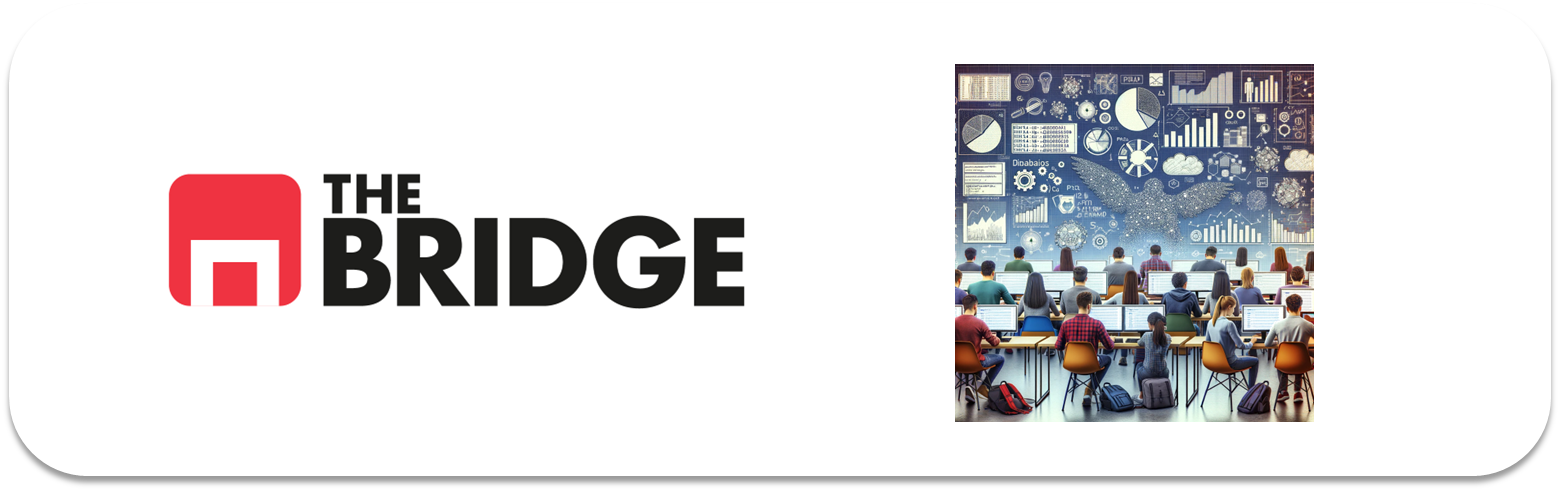

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



En primer lugar, se realizan los imports de las librerías que se van a utilizar.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Se carga el dataset y se comprueba que está limpio de nulos.

In [3]:
df_house = pd.read_csv('./data/obligatoria_hard.csv', sep = '|')

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Se escoge la variable target: MEDV. Y se visualiza el histograma con el kde, tiene una distribución prácticamente normal (aunque algunos valores muy grandes) y por eso se puede aplicar el modelo de regresión lineal.

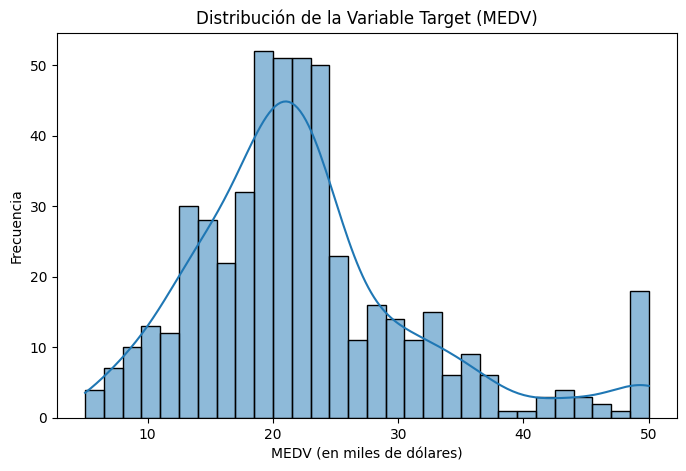

In [4]:
# Vemos la distribución
plt.figure(figsize=(8, 5))
sns.histplot(df_house['MEDV'], kde=True, bins=30)
plt.title('Distribución de la Variable Target (MEDV)')
plt.xlabel('MEDV (en miles de dólares)')
plt.ylabel('Frecuencia')
plt.show()

Se divide el dataset en train y test con proporción 80/20, y se  separa la x (features) e y (target) de ambos subconjuntos.

In [5]:
# Separar train y test 80/20
train_set, test_set = train_test_split(df_house, test_size=0.2, random_state=42)

# Separar en ambos casos X (features) e y (target)
X_train = train_set.drop(columns=['MEDV'])
y_train = train_set['MEDV']

X_test = test_set.drop(columns=['MEDV'])
y_test = test_set['MEDV']


Se hace un mini EDA para ver que features es interesante utilizar y cuáles no.

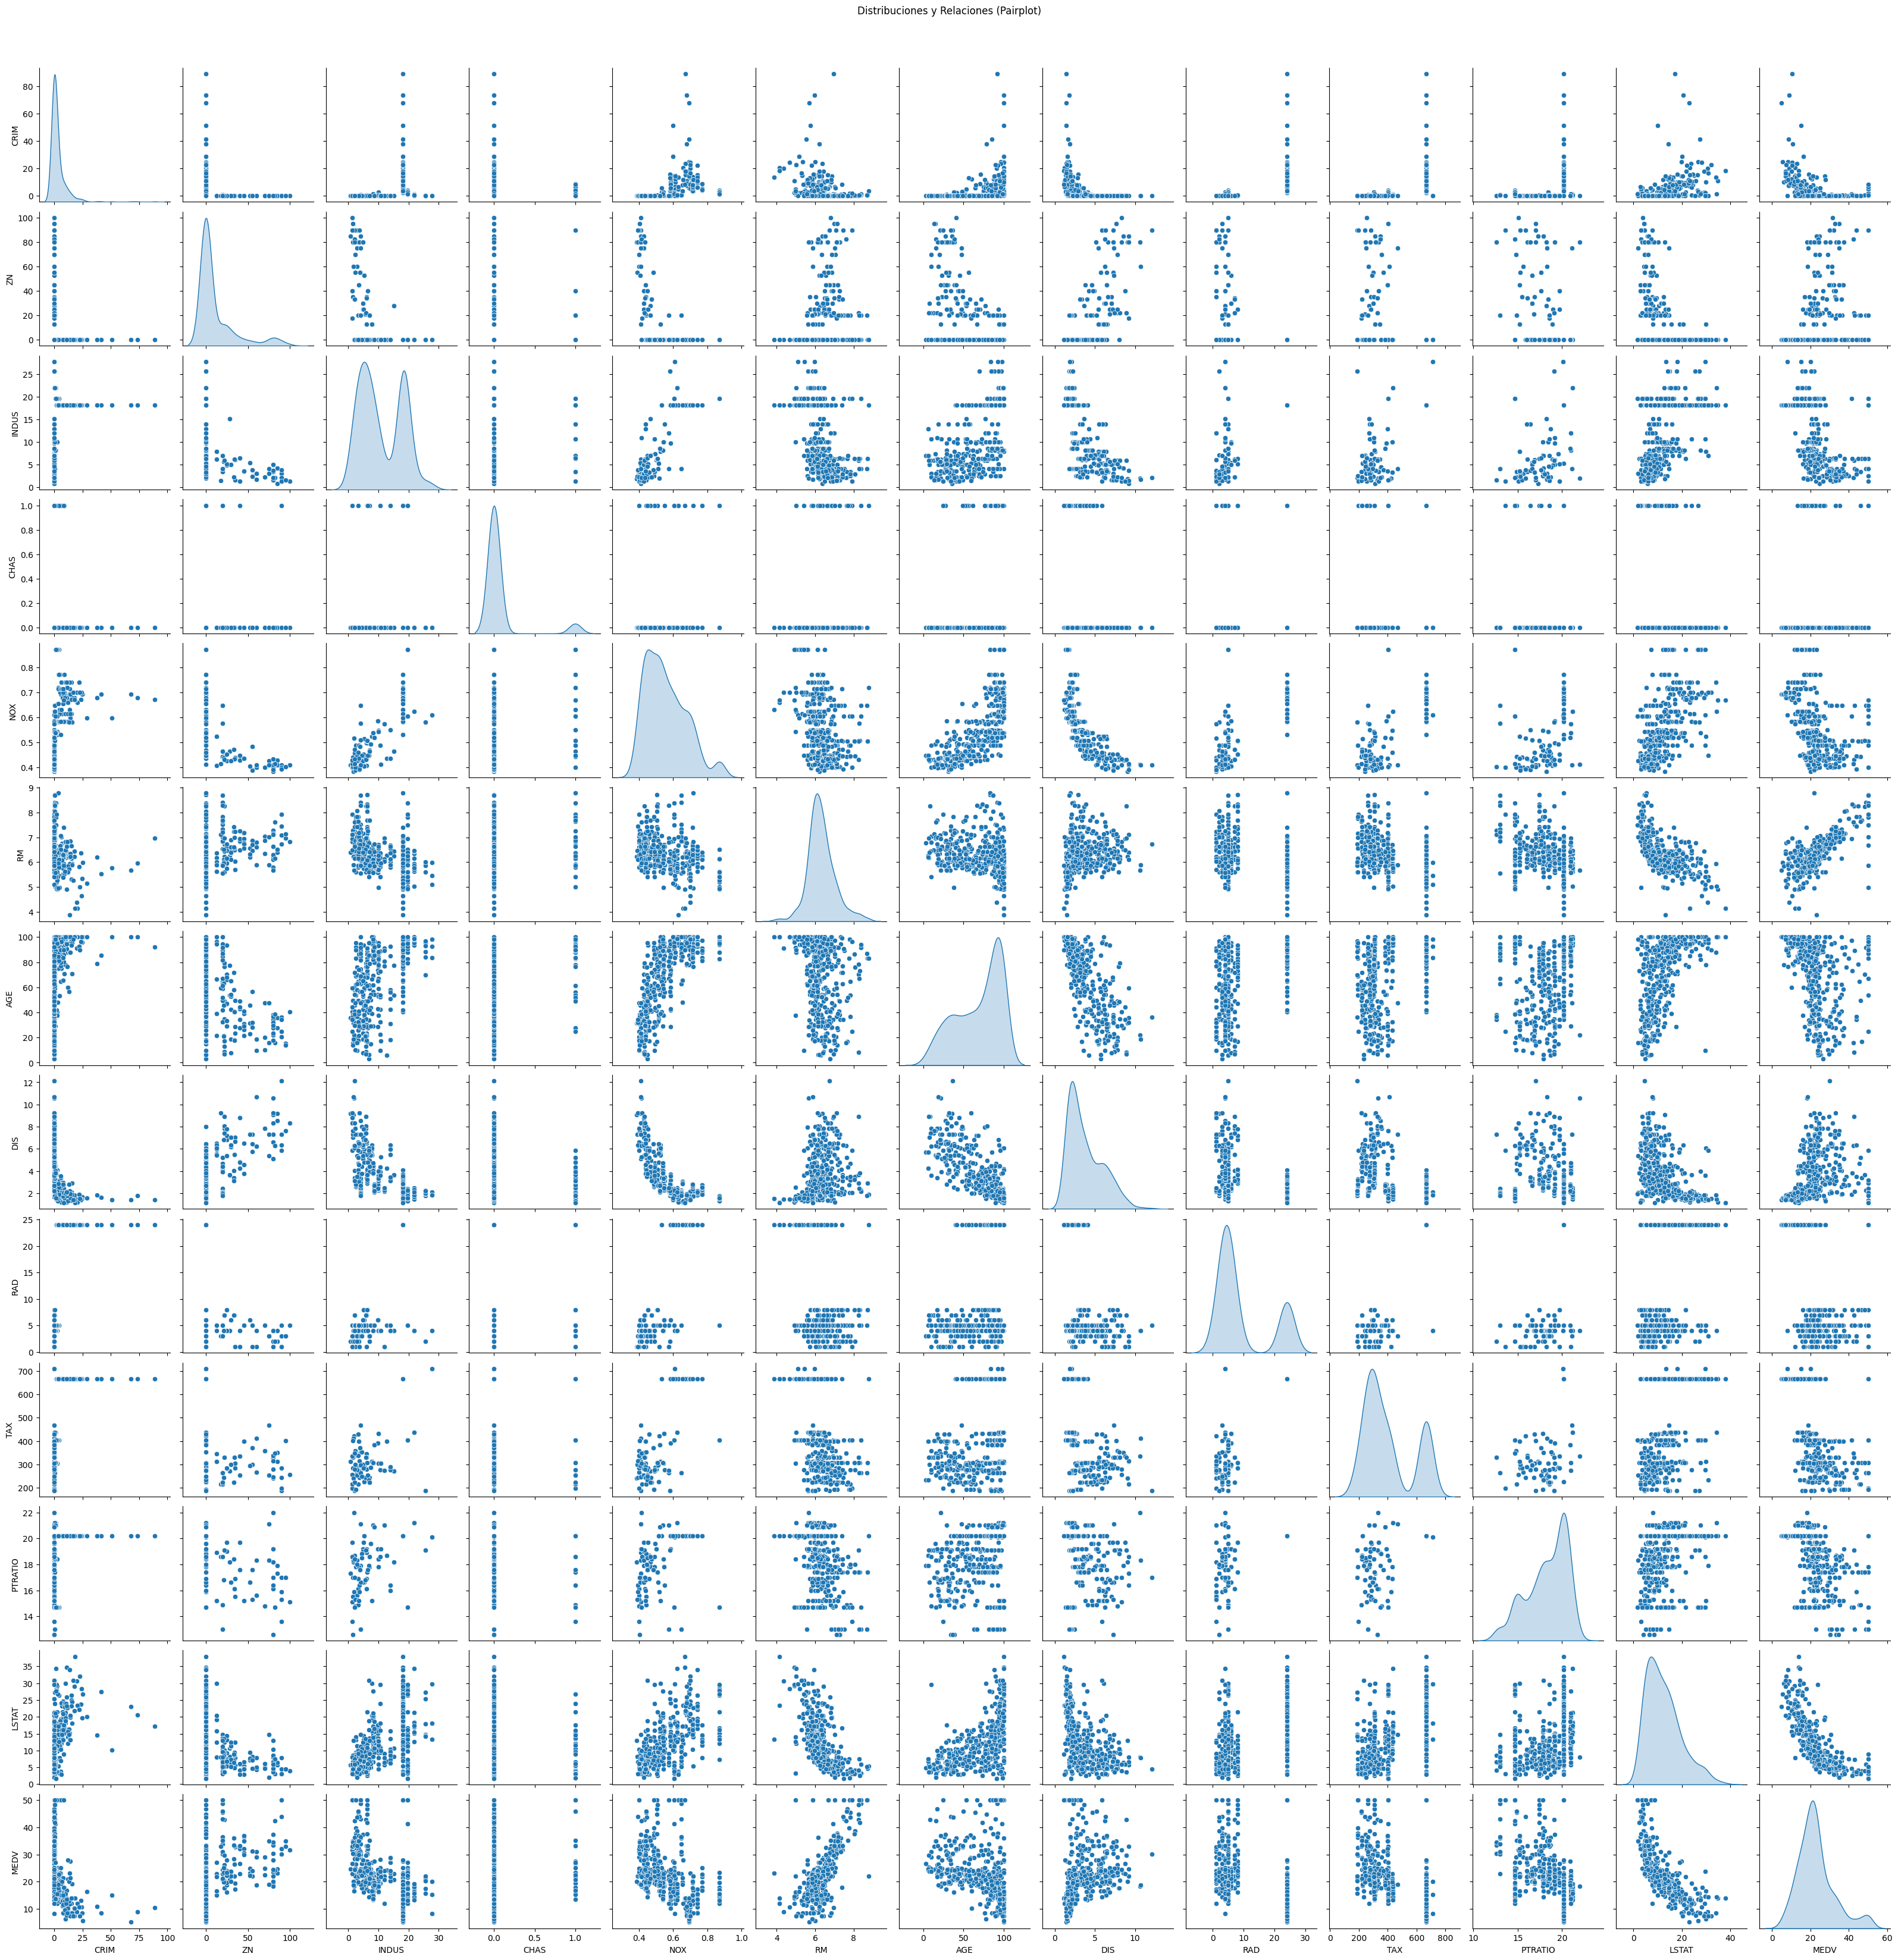

In [6]:
# Ver en geeneral la dsitribución de las features
sns.pairplot(train_set, diag_kind="kde", height=2.5)
plt.suptitle("Distribuciones y Relaciones (Pairplot)", y=1.02)
plt.show()


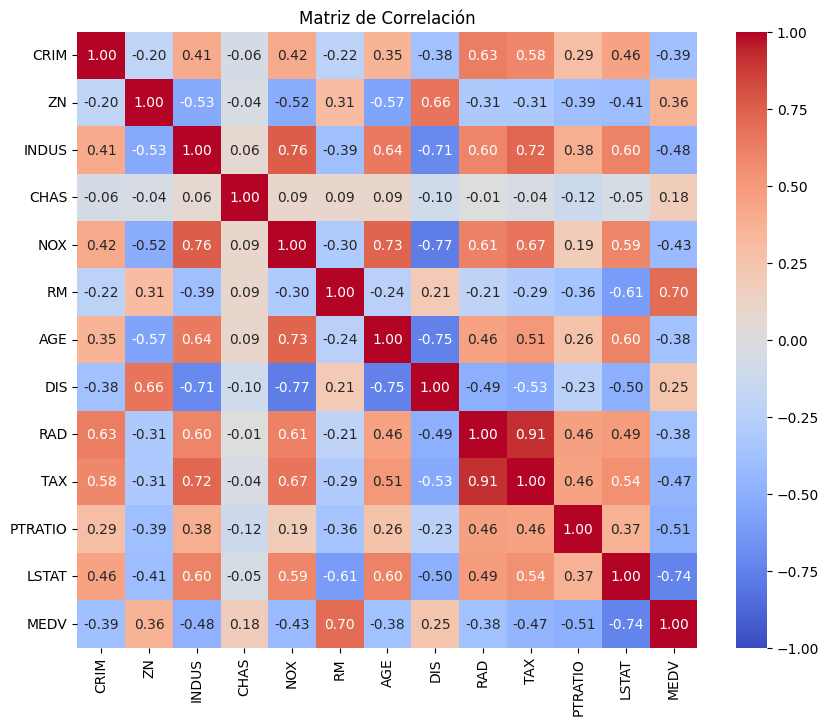

In [ ]:
# Matriz de correlación para tener de forma visual las relaciones entre features
plt.figure(figsize=(10, 8))
sns.heatmap(df_house.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [7]:
# Ver la correlación de las variables con MEDV y ordenarlas según el resultado
corr_with_target = df_house.corr()['MEDV'].drop('MEDV').sort_values(ascending=False)
print("Correlación con MEDV:\n", corr_with_target)


Correlación con MEDV:
 RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


Se seleccionan las features con >0.3 de correlación

In [54]:
selected_features = ['RM', 'ZN', 'AGE', 'RAD', 'CRIM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']


Se trata estas variables haciendo un escalado de las mismas.

In [55]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[selected_features]), columns=selected_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[selected_features]), columns=selected_features)

Se construye el modelo y se entrena con los datos que tenemos.

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_test_scaled)

Se analiza los pesos de las features analítica y gráficamente.

In [57]:
feat_coef = pd.DataFrame(lin_reg.coef_,
                        selected_features, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)
feat_coef


,importance_standarized
RM,3.309842
RAD,2.166272
INDUS,0.851492
AGE,0.798769
ZN,-0.278747
CRIM,-0.986263
NOX,-1.131697
TAX,-1.927410
PTRATIO,-2.288389
LSTAT,-4.030031


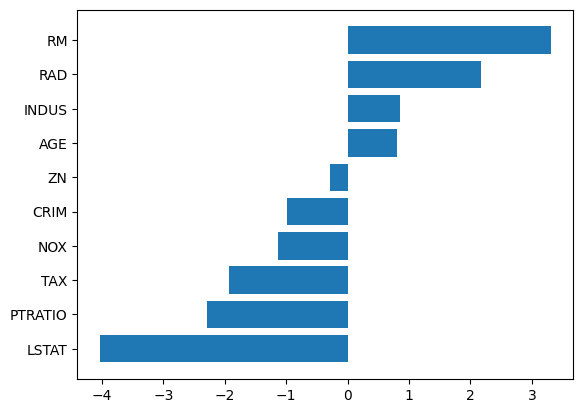

In [58]:
features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

Evaluación del modelo con difetentes métricas.

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo de regresión lineal:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")



Evaluación del modelo de regresión lineal:
MAE: 3.2595
MSE: 26.1287
RMSE: 5.1116
R2: 0.6437


Se comparan los valores de la predicción con los reales.

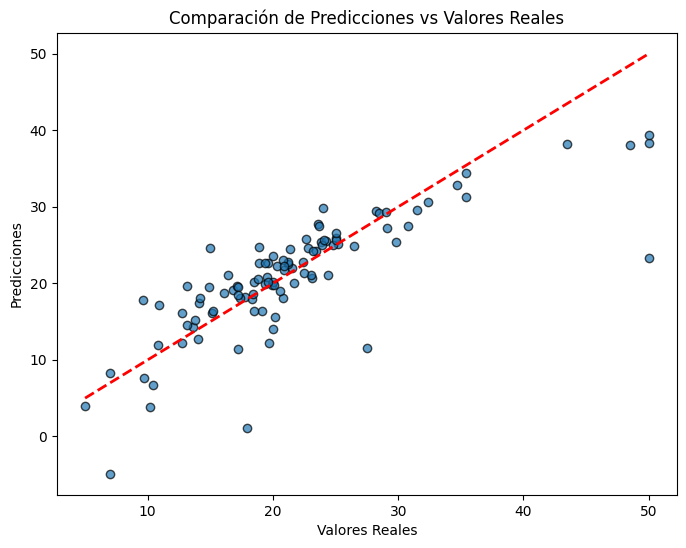

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Comparación de Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

Se regulariza con Ridge (aplanar los valores extremos) y Lasso (ayuda a mejor selección de features, aunque aquí ya hemos elegido un pequeño número).

In [61]:
# Ridge: probando tres valores de alfa
for alpha in [1, 10, 100]:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_scaled)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled))
    print(f"Ridge (alpha={alpha:.4f}): R2={r2_ridge:.4f}, MSE={mse_ridge:.4f}\n")


print("-" * 70)


# Lasso: probando tres valores de alfa
for alpha in [0.01, 0.5, 1]:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_reg.predict(X_test_scaled)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled))
    print(f"Lasso (alpha={alpha:.4f}): R2={r2_lasso:.4f}, MSE={mse_lasso:.4f}\n")


Ridge (alpha=1.0000): R2=0.6431, MSE=26.1729

Ridge (alpha=10.0000): R2=0.6391, MSE=26.4639

Ridge (alpha=100.0000): R2=0.6333, MSE=26.8948

----------------------------------------------------------------------
Lasso (alpha=0.0100): R2=0.6425, MSE=26.2137

Lasso (alpha=0.5000): R2=0.6286, MSE=27.2370

Lasso (alpha=1.0000): R2=0.6262, MSE=27.4123



In [ ]:
alpha = [0.1, 0.5, 0.7]
l1_ratio = [0.5, 0.7, 0.9]

for a in alpha:
    for l1 in l1_ratio:
        print(f"Probando con alpha={a} y l1_ratio={l1}")
        
        elastic_net = ElasticNet(alpha=a, l1_ratio=l1, random_state=42)
        elastic_net.fit(X_train_scaled, y_train)

        y_pred_EN = elastic_net.predict(X_test_scaled)
        
        r2_EN = r2_score(y_test, y_pred_EN)
        mse_EN = mean_squared_error(y_test, y_pred_EN)
        
        print(f"EN (alpha={a:.4f}, l1_ratio={l1:.4f}): R2={r2_EN:.4f}, MSE={mse_EN:.4f}")
        print("-" * 70)


Probando con alpha=0.1 y l1_ratio=0.5
EN (alpha=0.1000, l1_ratio=0.5000): R2=0.6323, MSE=26.9663
----------------------------------------------------------------------
Probando con alpha=0.1 y l1_ratio=0.7
EN (alpha=0.1000, l1_ratio=0.7000): R2=0.6305, MSE=27.0996
----------------------------------------------------------------------
Probando con alpha=0.1 y l1_ratio=0.9
EN (alpha=0.1000, l1_ratio=0.9000): R2=0.6277, MSE=27.3014
----------------------------------------------------------------------
Probando con alpha=0.5 y l1_ratio=0.5
EN (alpha=0.5000, l1_ratio=0.5000): R2=0.6296, MSE=27.1660
----------------------------------------------------------------------
Probando con alpha=0.5 y l1_ratio=0.7
EN (alpha=0.5000, l1_ratio=0.7000): R2=0.6295, MSE=27.1683
----------------------------------------------------------------------
Probando con alpha=0.5 y l1_ratio=0.9
EN (alpha=0.5000, l1_ratio=0.9000): R2=0.6293, MSE=27.1869
---------------------------------------------------------------

Conclusiones:

In [65]:
print(f"1. El modelo de regresión lineal simple tuvo un R2 de {r2:.4f}")
print("2. Ridge, Lasso y EN permiten mejorar la estabilidad del modelo, pero hay que ajustar correctamente sus hiperparámetros.")
print("3.1 Según los resultados, el modelo con Ridge regularizado a alpha=10 parece ser el mejor.")
print("3.2 Según los resultados, el modelo con Lasso regularizado a alpha=0.01 parece ser el mejor.")
print("3.3 Según los resultados, el modelo con EN regularizado a alpha=0.1 y l1=0.5 parece ser el mejor.")

1. El modelo de regresión lineal simple tuvo un R2 de 0.6437
2. Ridge, Lasso y EN permiten mejorar la estabilidad del modelo, pero hay que ajustar correctamente sus hiperparámetros.
3.1 Según los resultados, el modelo con Ridge regularizado a alpha=10 parece ser el mejor.
3.2 Según los resultados, el modelo con Lasso regularizado a alpha=0.01 parece ser el mejor.
3.3 Según los resultados, el modelo con EN regularizado a alpha=0.1 y l1=0.5 parece ser el mejor.
